In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install openai-whisper
import os
import torch
import whisper
from tqdm import tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 16.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.7 MB/s

In [ ]:
# DO NOT RUN IF EMBEDDINGS ARE ALREADY CREATED —
# YOU CAN USE PRECOMPUTED ONES IN THE CELLS BELOW

# Parameters
positive_dir = "/content/drive/MyDrive/Phonetics_Lab/DATASET/label_1"
negative_dir = "/content/drive/MyDrive/Phonetics_Lab/DATASET/label_0"
output_path = "/content/drive/MyDrive/Phonetics_Lab/whisper_embeddings2.pt"
model_size = "small"

# Load Whisper model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = whisper.load_model(model_size).to(device)

# Lists to store embeddings, labels, and filenames
features = []
labels = []
filenames = []

# Helper function for extracting embeddings
def extract_embedding(filepath):
    audio = whisper.load_audio(filepath)
    audio = whisper.pad_or_trim(audio)
    mel = whisper.log_mel_spectrogram(audio).to(device)
    with torch.no_grad():
        encoded = model.encoder(mel.unsqueeze(0))
        return encoded.squeeze(0).mean(dim=0).cpu()  # (D,)

# Process all files
for label, folder in [(1, positive_dir), (0, negative_dir)]:
    for fname in tqdm(os.listdir(folder), desc=f"Processing {folder}"):
        fpath = os.path.join(folder, fname)
        try:
            emb = extract_embedding(fpath)
            features.append(emb)
            labels.append(label)
            filenames.append(fname)
        except Exception as e:
            print(f"⚠️ Error with file {fpath}: {e}")

# Save everything to a single .pt file
torch.save({
    "embeddings": torch.stack(features),
    "labels": t


100%|███████████████████████████████████████| 461M/461M [00:38<00:00, 12.7MiB/s]
Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_1:  20%|██        | 1000/4976 [05:38<17:14,  3.84it/s]

⚠️ Error with file /content/drive/MyDrive/Phonetics_Lab/DATASET/label_1/audio_labels.csv: Failed to load audio: ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --en

Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_1: 100%|██████████| 4976/4976 [20:03<00:00,  4.14it/s]
Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0:  20%|██        | 999/4972 [15:47<1:12:10,  1.09s/it]

⚠️ Error with file /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0/audio_labels.csv: Failed to load audio: ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --en

Processing /content/drive/MyDrive/Phonetics_Lab/DATASET/label_0: 100%|██████████| 4972/4972 [1:17:18<00:00,  1.07it/s]

✅ Saved to /content/drive/MyDrive/Phonetics_Lab/whisper_embeddings2.pt


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


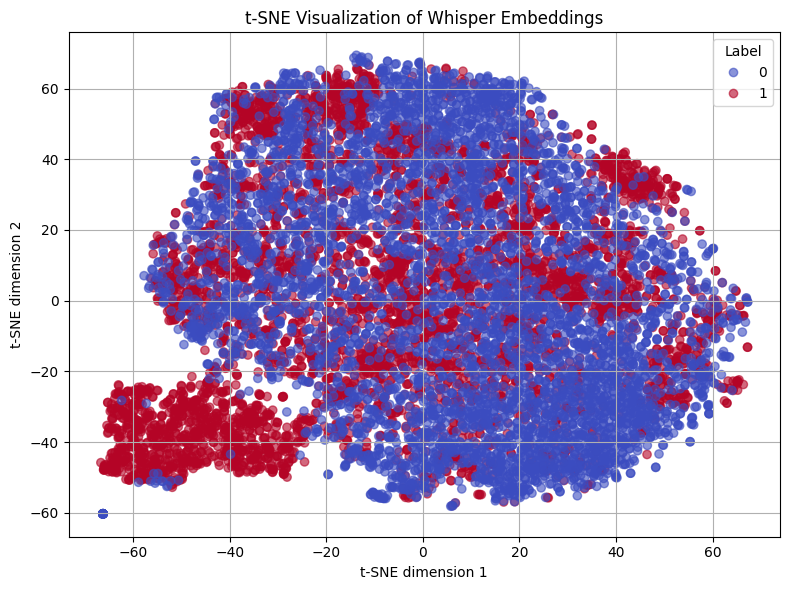

In [ ]:
!pip install scikit-learn matplotlib

# VISUALIZE THE EMBEDDINGS TO SEE HOW THEY ARE DISTRIBUTED IN SPACE
# WE CAN SEE A DISTINCT CLUSTER OF KEYWORDS, BUT IN THE CENTER AND RIGHT THERE IS A LOT OF OVERLAP BETWEEN RED AND BLUE,
# INDICATING THAT THE CLASSES ARE NOT PERFECTLY SEPARABLE FOR WHISPER

import torch
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Path to the file
data_path = "/content/drive/MyDrive/Phonetics_Lab/whisper_embeddings2.pt"

# Load the data
data = torch.load(data_path)
X = data["embeddings"]
y = data["labels"]

# Convert to NumPy
X = X.numpy() if isinstance(X, torch.Tensor) else torch.stack(X).numpy()
y = y.numpy() if isinstance(y, torch.Tensor) else y

# Feature standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="coolwarm", alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Label")
plt.title("t-SNE Visualization of Whisper Embeddings")
plt.xlabel("t-SNE dimension 1")
plt.ylabel("t-SNE dimension 2")
plt.grid(True)
plt.t


In [ ]:
# EXAMINE WHICH EXACT DATA POINTS FORM THE DISTINCT CLUSTER OF RED DOTS.
# WE SEE THAT ALMOST ALL OF THEM ARE AUGMENTED AUDIO FILES.
# ONE POSSIBLE REASON IS THAT AUGMENTATION PRODUCES SIMILAR FEATURES
# (SAME VOICE, NOISE PATTERN, LENGTH, RHYTHM, ETC.), WHICH MAY LEAD TO OVERFITTING ON SYNTHETIC DATA.

import torch
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load the data
data_path = "/content/drive/MyDrive/Phonetics_Lab/whisper_embeddings2.pt"
data = torch.load(data_path)
X = data["embeddings"]
y = data["labels"]

# Convert to numpy
X = X.numpy() if isinstance(X, torch.Tensor) else torch.stack(X).numpy()
y = y.numpy() if isinstance(y, torch.Tensor) else y

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# t-SNE projection
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Store in a DataFrame
df = pd.DataFrame({
    "tsne_x": X_tsne[:, 0],
    "tsne_y": X_tsne[:, 1],
    "label": y
})

filenames = data["filenames"]
df["filename"] = filenames

# Select outliers from the lower-left corner (label 1 only)
subset = df[df["label"] == 1].sort_values(by=["tsne_x", "tsne_y"]).head(30)

# Print results
print(subset)


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


         tsne_x     tsne_y  label  \
1927 -66.734314 -45.833511      1   
47   -66.182205 -47.828480      1   
34   -66.101921 -47.925804      1   
412  -66.051865 -46.891808      1   
374  -66.049057 -47.569725      1   
35   -66.011925 -47.949451      1   
419  -65.993294 -47.405910      1   
868  -65.940903 -46.472488      1   
355  -65.918900 -46.926884      1   
843  -65.687164 -46.497299      1   
369  -65.470062 -35.336060      1   
358  -65.315872 -37.481339      1   
505  -65.303238 -28.840958      1   
481  -65.297424 -28.807159      1   
377  -65.264389 -47.753944      1   
130  -65.173294 -37.253719      1   
450  -65.127235 -36.125031      1   
443  -65.100212 -48.381973      1   
295  -64.993279 -35.968647      1   
785  -64.900124 -46.977261      1   
640  -64.845177 -46.888927      1   
992  -64.836586 -44.535870      1   
57   -64.799065 -31.306175      1   
906  -64.547249 -43.248695      1   
417  -64.525948 -30.512833      1   
466  -64.513626 -35.910839      1   
3

**FIRST ITERATION OF WORKING WITH WHISPER**

Originally, Whisper returns embeddings in the shape [B, T, D]. In this version, the embeddings are averaged over the time dimension (mean(dim=0)), i.e. [T, D] → [D].

All embeddings receive equal attention during training including the augmented audio samples.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

data = torch.load("/content/drive/MyDrive/Phonetics_Lab/whisper_embeddings2.pt")
X = data["embeddings"]
y = data["labels"].float()

# Split into train / val / test sets
total_len = len(X)
train_len = int(0.8 * total_len)
val_len = int(0.1 * total_len)
test_len = total_len - train_len - val_len

dataset = TensorDataset(X, y)
train_set, val_set, test_set = random_split(dataset, [train_len, val_len, test_len])

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)
test_loader = DataLoader(test_set, batch_size=32)

# Cosine similarity classifier
class CosineClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, input_dim))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        x = F.normalize(x, dim=-1)
        w = F.normalize(self.weight, dim=-1)
        return F.linear(x, w) + self.bias  # logits

# Linear classifier (simple fully connected)
class LinearClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.fc(x).squeeze()

# Multilayer perceptron classifier
class MLPClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.net(x).squeeze()

# Training loop
def train_model(model, train_loader, val_loader, epochs=10, lr=1e-4):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()
    history = {"train_loss": [], "val_loss": [], "val_acc": [], "val_f1": []}

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb).squeeze()
            loss = criterion(logits, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        val_loss, preds, targets = 0, [], []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                logits = model(xb).squeeze()
                loss = criterion(logits, yb)
                val_loss += loss.item()
                probs = torch.sigmoid(logits)
                pred = (probs > 0.5).cpu()
                preds += pred.tolist()
                targets += yb.cpu().tolist()

        acc = accuracy_score(targets, preds)
        f1 = f1_score(targets, preds)
        history["train_loss"].append(train_loss / len(train_loader))
        history["val_loss"].append(val_loss / len(val_loader))
        history["val_acc"].append(acc)
        history["val_f1"].append(f1)
        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Val Acc={acc:.3f}, F1={f1:.3f}")

    return history


In [ ]:
def plot_history(history, title_suffix=""):
    epochs = range(1, len(history["train_loss"]) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.plot(epochs, history["train_loss"], label="Train")
    plt.plot(epochs, history["val_loss"], label="Val")
    plt.title("Loss" + title_suffix)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(epochs, history["val_acc"], label="Val Acc")
    plt.title("Accuracy" + title_suffix)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.subplot(1, 3, 3)
    plt.plot(epochs, history["val_f1"], label="Val F1")
    plt.title("F1 Score" + title_suffix)
    plt.xlabel("Epoch")
    plt.ylabel("F1")

    plt.tight_layout()
    plt.show()


In [ ]:
def evaluate(model, loader, name="Model"):
    model.eval()
    preds, targets, probs = [], [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            logits = model(xb)
            prob = torch.sigmoid(logits).cpu()
            pred = (prob > 0.5).int()
            preds += pred.tolist()
            targets += yb.int().tolist()
            probs += prob.tolist()

    acc = accuracy_score(targets, preds)
    prec = precision_score(targets, preds)
    rec = recall_score(targets, preds)
    f1 = f1_score(targets, preds)

    print(f"\n🔍 Test ({name}): Acc={acc:.3f}  Prec={prec:.3f}  Rec={rec:.3f}  F1={f1:.3f}")

    plt.figure(figsize=(6, 4))
    plt.hist([p for p, t in zip(probs, targets) if t == 1], bins=20, alpha=0.6, label="Keyword")
    plt.hist([p for p, t in zip(probs, targets) if t == 0], bins=20, alpha=0.6, label="Non-keyword")
    plt.xlabel("Predicted probability")
    plt.title(f"Prediction Distribution: {name}")
    plt.legend()
    plt.grid(True)
    plt.show()


Epoch 1: Train Loss=172.5360, Val Loss=22.1740, Val Acc=0.491, F1=0.658
Epoch 2: Train Loss=172.5197, Val Loss=22.1711, Val Acc=0.491, F1=0.658
Epoch 3: Train Loss=172.5036, Val Loss=22.1683, Val Acc=0.491, F1=0.658
Epoch 4: Train Loss=172.4856, Val Loss=22.1653, Val Acc=0.491, F1=0.658
Epoch 5: Train Loss=172.4700, Val Loss=22.1624, Val Acc=0.502, F1=0.663
Epoch 6: Train Loss=172.4531, Val Loss=22.1596, Val Acc=0.505, F1=0.663
Epoch 7: Train Loss=172.4366, Val Loss=22.1569, Val Acc=0.515, F1=0.668
Epoch 8: Train Loss=172.4210, Val Loss=22.1542, Val Acc=0.522, F1=0.669
Epoch 9: Train Loss=172.4048, Val Loss=22.1513, Val Acc=0.543, F1=0.677
Epoch 10: Train Loss=172.3877, Val Loss=22.1486, Val Acc=0.565, F1=0.687


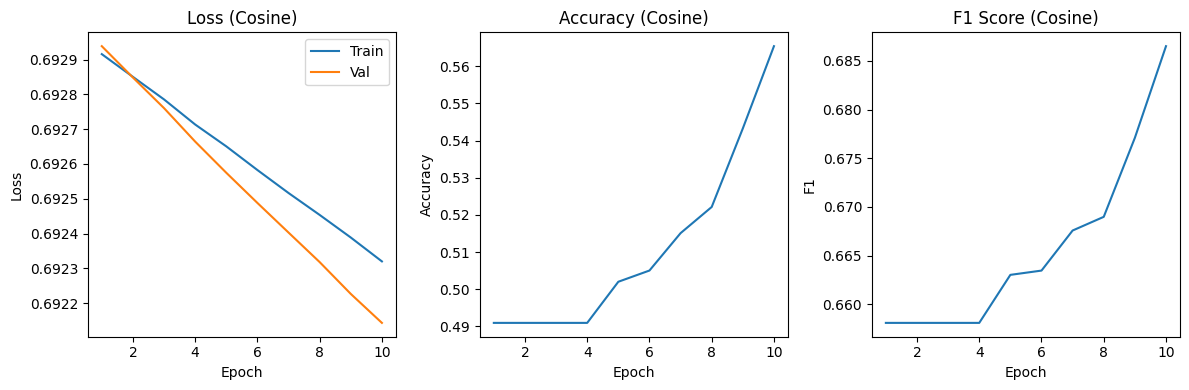


🔍 Test (Cosine): Acc=0.560  Prec=0.532  Rec=0.964  F1=0.685


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


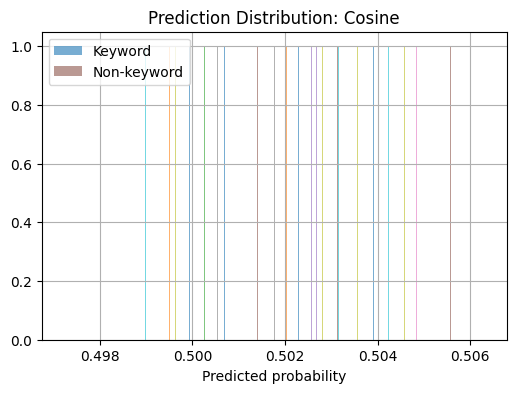

Epoch 1: Train Loss=168.0008, Val Loss=20.8528, Val Acc=0.640, F1=0.632
Epoch 2: Train Loss=162.2933, Val Loss=20.2657, Val Acc=0.647, F1=0.629
Epoch 3: Train Loss=159.1495, Val Loss=19.8914, Val Acc=0.650, F1=0.618
Epoch 4: Train Loss=156.9048, Val Loss=19.7492, Val Acc=0.647, F1=0.661
Epoch 5: Train Loss=155.0701, Val Loss=19.4972, Val Acc=0.651, F1=0.658
Epoch 6: Train Loss=153.4177, Val Loss=19.3145, Val Acc=0.660, F1=0.672
Epoch 7: Train Loss=151.9416, Val Loss=19.0445, Val Acc=0.659, F1=0.649
Epoch 8: Train Loss=150.4007, Val Loss=18.9091, Val Acc=0.663, F1=0.665
Epoch 9: Train Loss=149.1314, Val Loss=18.7173, Val Acc=0.667, F1=0.654
Epoch 10: Train Loss=147.7257, Val Loss=18.5632, Val Acc=0.670, F1=0.655


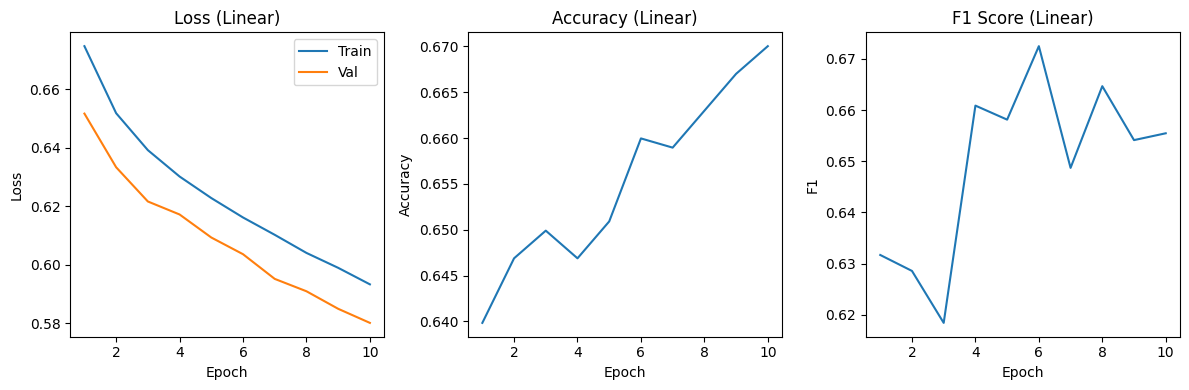


🔍 Test (Linear): Acc=0.705  Prec=0.727  Rec=0.651  F1=0.687


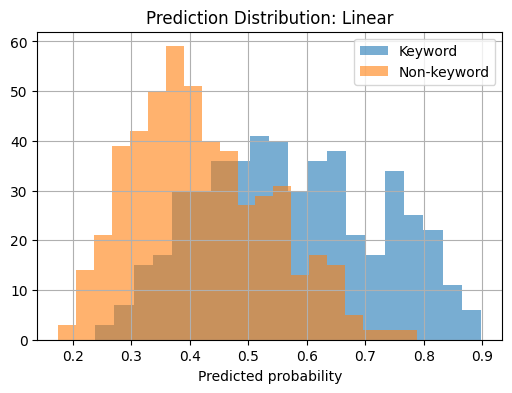

In [ ]:
# Cosine Classifier
cos_model = CosineClassifier(input_dim=X.shape[1]).to(device)
cos_hist = train_model(cos_model, train_loader, val_loader, epochs=10)
plot_history(cos_hist, title_suffix=" (Cosine)")
evaluate(cos_model, test_loader, name="Cosine")

# Linear Classifier
lin_model = LinearClassifier(input_dim=X.shape[1]).to(device)
lin_hist = train_model(lin_model, train_loader, val_loader, epochs=10)
plot_history(lin_hist, title_suffix=" (Linear)")
evaluate(lin_model, test_loader, name="Linear")



Epoch 1: Train Loss=163.9433, Val Loss=20.0864, Val Acc=0.661, F1=0.690
Epoch 2: Train Loss=155.6617, Val Loss=19.1033, Val Acc=0.682, F1=0.674
Epoch 3: Train Loss=149.4423, Val Loss=18.4233, Val Acc=0.716, F1=0.713
Epoch 4: Train Loss=143.4963, Val Loss=17.7620, Val Acc=0.736, F1=0.739
Epoch 5: Train Loss=137.7507, Val Loss=17.1442, Val Acc=0.756, F1=0.748
Epoch 6: Train Loss=133.4102, Val Loss=16.6078, Val Acc=0.758, F1=0.741
Epoch 7: Train Loss=128.9941, Val Loss=16.0207, Val Acc=0.771, F1=0.773
Epoch 8: Train Loss=124.8024, Val Loss=15.5252, Val Acc=0.783, F1=0.777
Epoch 9: Train Loss=120.5556, Val Loss=15.1721, Val Acc=0.785, F1=0.768
Epoch 10: Train Loss=117.1354, Val Loss=14.7596, Val Acc=0.793, F1=0.779


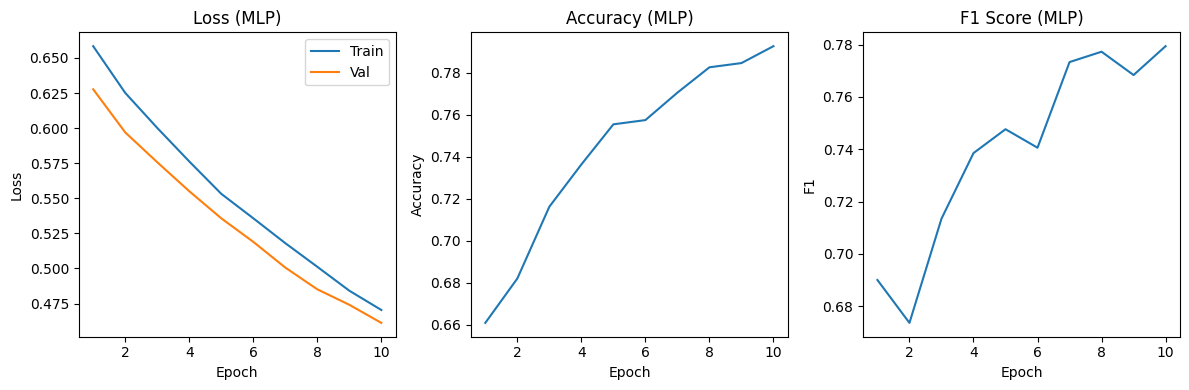


🔍 Test (MLP): Acc=0.795  Prec=0.794  Rec=0.771  F1=0.783


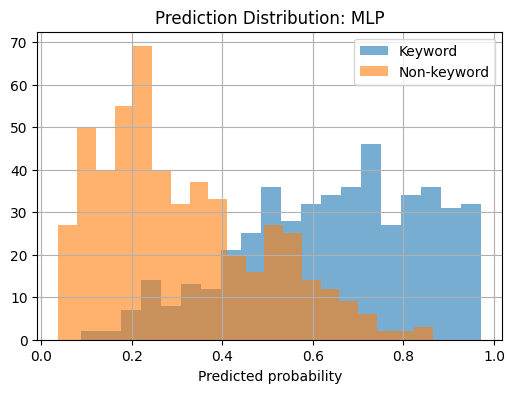

In [ ]:
# MLPClassifier
mlp_model = MLPClassifier(input_dim=X.shape[1]).to(device)
mlp_hist = train_model(mlp_model, train_loader, val_loader, epochs=10)
plot_history(mlp_hist, title_suffix=" (MLP)")
evaluate(mlp_model, test_loader, name="MLP")

**SECOND ITERATION OF WORKING WITH WHISPER**
In this version, loss weighting and contrastive loss to all augmented audio samples.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

data = torch.load("/content/drive/MyDrive/Phonetics_Lab/whisper_embeddings2_fixed.pt")
X = data["embeddings"]
y = data["labels"].float()
filenames = data["filenames"]  # must be saved during embedding generation

# Augmentation flags and anchor indices
is_aug = [1 if name.startswith("aug_") else 0 for name in filenames]
name_to_index = {name: i for i, name in enumerate(filenames) if not name.startswith("aug_")}
paired_indices = []
for name in filenames:
    if name.startswith("aug_"):
        original_name = name[len("aug_"):]
        anchor_idx = name_to_index.get(original_name, -1)
        paired_indices.append(anchor_idx)
    else:
        paired_indices.append(-1)

is_aug = torch.tensor(is_aug)
paired_indices = torch.tensor(paired_indices)

# Custom Dataset
class KeywordDataset(Dataset):
    def __init__(self, X, y, is_aug, paired_indices):
        self.X = X
        self.y = y
        self.is_aug = is_aug
        self.paired_indices = paired_indices

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return (
            self.X[idx],
            self.y[idx],
            self.is_aug[idx],
            self.paired_indices[idx]
        )

# Train / val / test split
total_len = len(X)
train_len = int(0.8 * total_len)
val_len = int(0.1 * total_len)
test_len = total_len - train_len - val_len

dataset = KeywordDataset(X, y, is_aug, paired_indices)
train_set, val_set, test_set = random_split(dataset, [train_len, val_len, test_len])

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)
test_loader = DataLoader(test_set, batch_size=32)

# Classifiers
class CosineClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, input_dim))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        x = F.normalize(x, dim=-1)
        w = F.normalize(self.weight, dim=-1)
        return F.linear(x, w) + self.bias

class LinearClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.fc(x).squeeze()

class MLPClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.net(x).squeeze()

# Training function
def train_model(model, train_loader, val_loader, X_all, epochs=10, lr=1e-4, lambda_contrastive=0.1):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss(reduction='none')  # apply custom weights
    history = {"train_loss": [], "val_loss": [], "val_acc": [], "val_f1": []}

    for epoch in range(epochs):
        model.train()
        train_loss = 0

        for xb, yb, is_aug, anchor_idx in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            is_aug = is_aug.to(device).float()
            anchor_idx = anchor_idx.to(device)

            logits = model(xb).squeeze()
            bce_loss = criterion(logits, yb)

            # loss weighting: downweight augmented samples
            weights = 1.0 - 0.5 * is_aug
            loss = (bce_loss * weights).mean()

            # contrastive loss for augmented samples with known anchors
            valid_mask = (anchor_idx != -1)
            if valid_mask.any():
                anchors = X_all[anchor_idx[valid_mask]].to(device)
                emb_x = xb[valid_mask]
                cosine_sim = F.cosine_similarity(emb_x, anchors)
                contrastive_loss = (1 - cosine_sim).mean()
                loss = loss + lambda_contrastive * contrastive_loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        val_loss, preds, targets = 0, [], []
        with torch.no_grad():
            for xb, yb, *_ i_*


In [ ]:
def plot_history(history, title_suffix=""):
    epochs = range(1, len(history["train_loss"]) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.plot(epochs, history["train_loss"], label="Train")
    plt.plot(epochs, history["val_loss"], label="Val")
    plt.title("Loss" + title_suffix)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(epochs, history["val_acc"], label="Val Acc")
    plt.title("Accuracy" + title_suffix)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.subplot(1, 3, 3)
    plt.plot(epochs, history["val_f1"], label="Val F1")
    plt.title("F1 Score" + title_suffix)
    plt.xlabel("Epoch")
    plt.ylabel("F1")

    plt.tight_layout()
    plt.show()

In [ ]:
def evaluate(model, loader, name="Model"):
    model.eval()
    preds, targets, probs = [], [], []
    with torch.no_grad():
        for xb, yb, *_ in loader:  # ignore is_aug and paired_idx
            xb = xb.to(device)
            logits = model(xb)
            prob = torch.sigmoid(logits).cpu()
            pred = (prob > 0.5).int()
            preds += pred.tolist()
            targets += yb.int().tolist()
            probs += prob.tolist()

    acc = accuracy_score(targets, preds)
    prec = precision_score(targets, preds)
    rec = recall_score(targets, preds)
    f1 = f1_score(targets, preds)

    print(f"\n🔍 Test ({name}): Acc={acc:.3f}  Prec={prec:.3f}  Rec={rec:.3f}  F1={f1:.3f}")

    plt.figure(figsize=(6, 4))
    plt.hist([p for p, t in zip(probs, targets) if t == 1], bins=20, alpha=0.6, label="Keyword")
    plt.hist([p for p, t in zip(probs, targets) if t == 0], bins=20, alpha=0.6, label="Non-keyword")
    plt.xlabel("Predicted probability")
    plt.title(f"Prediction Distribution: {name}")
    plt.legend()
    plt.grid(True)
    plt.show()


Epoch 1: Train Loss=165.3306, Val Loss=22.1879, Val Acc=0.488, F1=0.656
Epoch 2: Train Loss=165.1548, Val Loss=22.1783, Val Acc=0.488, F1=0.656
Epoch 3: Train Loss=164.9751, Val Loss=22.1709, Val Acc=0.488, F1=0.656
Epoch 4: Train Loss=164.8599, Val Loss=22.1652, Val Acc=0.488, F1=0.656
Epoch 5: Train Loss=164.7440, Val Loss=22.1606, Val Acc=0.488, F1=0.656
Epoch 6: Train Loss=164.6376, Val Loss=22.1574, Val Acc=0.488, F1=0.656
Epoch 7: Train Loss=164.5468, Val Loss=22.1550, Val Acc=0.495, F1=0.658
Epoch 8: Train Loss=164.4861, Val Loss=22.1535, Val Acc=0.629, F1=0.637
Epoch 9: Train Loss=164.4325, Val Loss=22.1526, Val Acc=0.558, F1=0.220
Epoch 10: Train Loss=164.3688, Val Loss=22.1521, Val Acc=0.516, F1=0.024


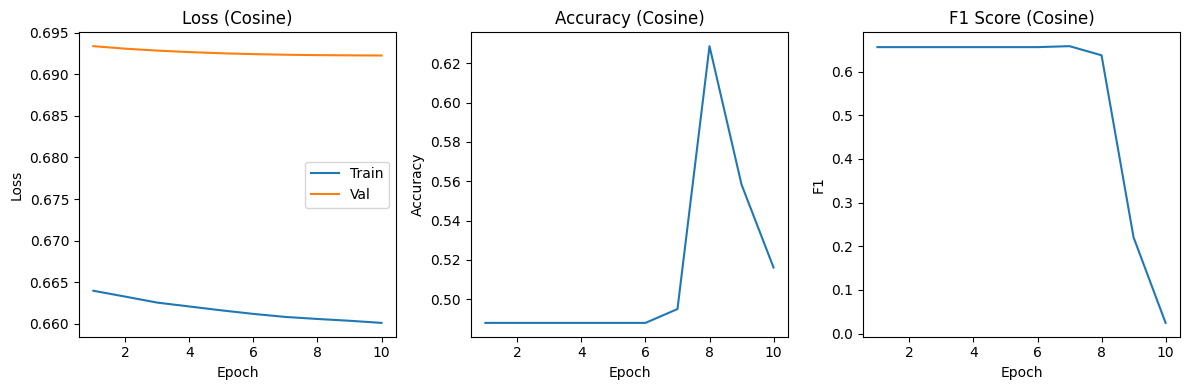


🔍 Test (Cosine): Acc=0.486  Prec=0.875  Rec=0.014  F1=0.027


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


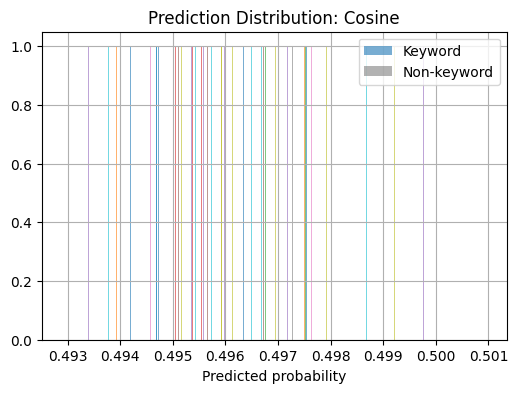

In [ ]:
# Cosine Classifier
cos_model = CosineClassifier(input_dim=X.shape[1]).to(device)
cos_hist = train_model(cos_model, train_loader, val_loader, epochs=10, X_all=X)
plot_history(cos_hist, title_suffix=" (Cosine)")
evaluate(cos_model, test_loader, name="Cosine")


Epoch 1: Train Loss=160.9623, Val Loss=21.2978, Val Acc=0.628, F1=0.576
Epoch 2: Train Loss=157.0304, Val Loss=20.8147, Val Acc=0.633, F1=0.568
Epoch 3: Train Loss=154.5575, Val Loss=20.4980, Val Acc=0.645, F1=0.588
Epoch 4: Train Loss=152.5903, Val Loss=20.4755, Val Acc=0.640, F1=0.524
Epoch 5: Train Loss=150.9860, Val Loss=20.0863, Val Acc=0.655, F1=0.593
Epoch 6: Train Loss=149.4830, Val Loss=19.8928, Val Acc=0.656, F1=0.600
Epoch 7: Train Loss=148.0549, Val Loss=19.6762, Val Acc=0.667, F1=0.629
Epoch 8: Train Loss=146.7569, Val Loss=19.5045, Val Acc=0.677, F1=0.677
Epoch 9: Train Loss=145.5916, Val Loss=19.3508, Val Acc=0.678, F1=0.651
Epoch 10: Train Loss=144.4402, Val Loss=19.2018, Val Acc=0.684, F1=0.662


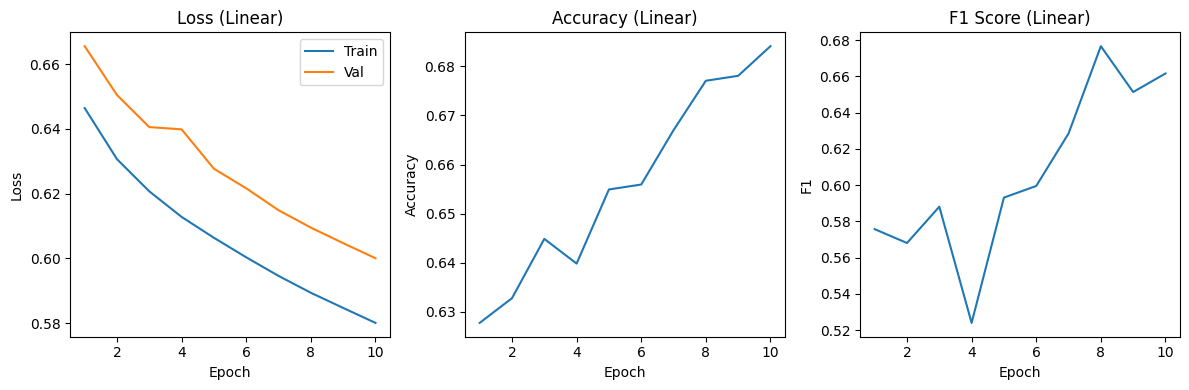


🔍 Test (Linear): Acc=0.685  Prec=0.716  Rec=0.654  F1=0.684


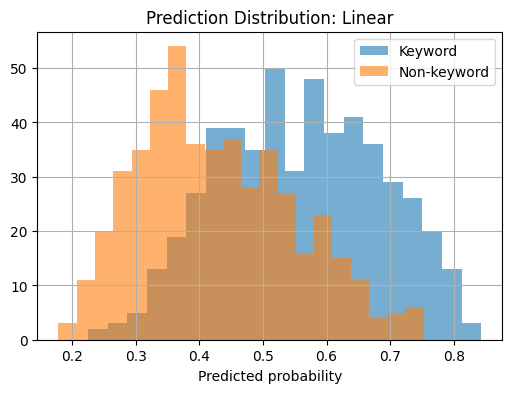

In [ ]:
# Linear Classifier
lin_model = LinearClassifier(input_dim=X.shape[1]).to(device)
lin_hist = train_model(lin_model, train_loader, val_loader, epochs=10, X_all=X)
plot_history(lin_hist, title_suffix=" (Linear)")
evaluate(lin_model, test_loader, name="Linear")

Epoch 1: Train Loss=158.0020, Val Loss=20.9443, Val Acc=0.618, F1=0.520
Epoch 2: Train Loss=150.8086, Val Loss=20.0615, Val Acc=0.628, F1=0.561
Epoch 3: Train Loss=144.3743, Val Loss=19.2094, Val Acc=0.645, F1=0.604
Epoch 4: Train Loss=139.3895, Val Loss=18.4708, Val Acc=0.666, F1=0.648
Epoch 5: Train Loss=134.5419, Val Loss=17.9402, Val Acc=0.691, F1=0.661
Epoch 6: Train Loss=130.1982, Val Loss=17.2366, Val Acc=0.708, F1=0.698
Epoch 7: Train Loss=126.0987, Val Loss=16.9384, Val Acc=0.718, F1=0.685
Epoch 8: Train Loss=121.4789, Val Loss=16.0820, Val Acc=0.748, F1=0.747
Epoch 9: Train Loss=117.8826, Val Loss=15.7243, Val Acc=0.741, F1=0.726
Epoch 10: Train Loss=114.3265, Val Loss=15.3530, Val Acc=0.760, F1=0.742


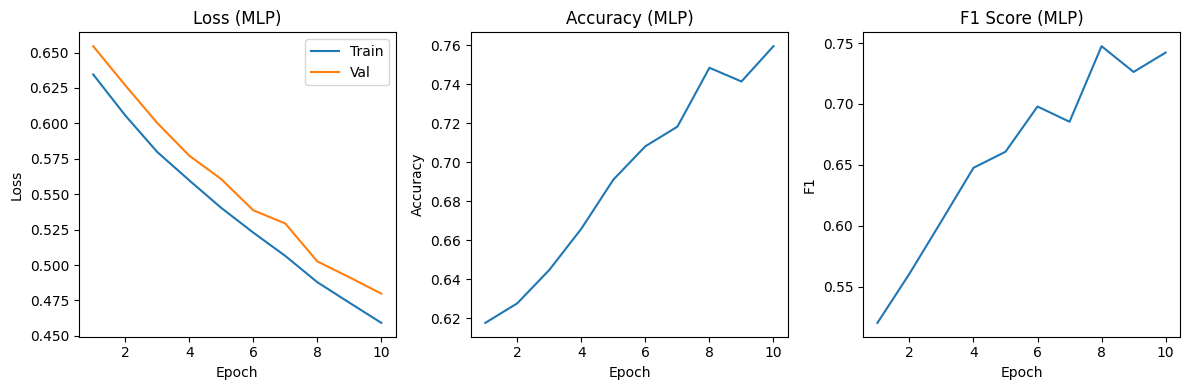


🔍 Test (MLP): Acc=0.776  Prec=0.843  Rec=0.693  F1=0.760


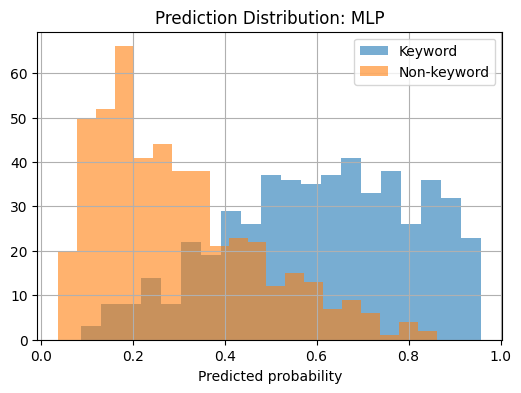

In [ ]:
# MLP Classifier
mlp_model = MLPClassifier(input_dim=X.shape[1]).to(device)
mlp_hist = train_model(mlp_model, train_loader, val_loader, epochs=10, X_all=X)
plot_history(mlp_hist, title_suffix=" (MLP)")
evaluate(mlp_model, test_loader, name="MLP")

***THIRD ITERATION OF WORKING WITH WHISPER ***
 contrastive loss only to rare words +  Loss weighting


In [ ]:
import torch

data = torch.load("/content/drive/MyDrive/Phonetics_Lab/whisper_embeddings2_fixed.pt")
filenames = data["filenames"]

# word statistics (originals, augmentations)
word_stats = {
    "блять": (600, 0),
    "пиздец": (571, 29),
    "бля": (552, 45),
    "хуй": (534, 62),
    "нахуй": (492, 97),
    "сука": (463, 117),
    "ебать": (270, 184),
    "хуйня": (267, 182),
    "похуй": (154, 142),
    "пизда": (107, 106)
}

# Words where augmentations are more than 20% considered rare
rare_words = {word for word, (orig, aug) in word_stats.items() if aug / (orig + aug) > 0.2}

# determine whether to apply contrastive loss for each file
apply_contrastive = []
for fname in filenames:
    if fname.startswith("aug_"):
        original_name = fname[len("aug_"):]
        matched_word = None
        for word in rare_words:
             if original_name.startswith(word):
                matched_word = word
                break
        apply_contrastive.append(matched_word is not None)
    else:
        apply_contrastive.append(False)

# Stats
print(f"Total files: {len(filenames)}")
print(f"Files where contrastive loss will be applied: {sum(apply_contrastive)}")

# Show first examples
print("\nExamples of files where contrastive loss will be applied:")
for f in [f for f, flag in zip(filenames, apply_contrastive) if flag][:700]:
    print(f)


Всего файлов: 9945
Файлов с применением contrastive loss: 720

Примеры файлов, где будет применён contrastive loss:
aug_сука_f66f2fe0-ccb0-42e9-9eb6-89b64a89b313_chunk4.wav
aug_сука_f6ddbea7-370f-4349-ad2d-76488d5e71d7_chunk9.wav
aug_сука_fa3a6b85-2425-4683-a1a2-5d918d8625f2_chunk9.wav
aug_сука_5fca7037-830a-47b6-b92b-a14748b6ee7a_chunk2.wav
aug_сука_1f1cfd69-e2e4-4930-b911-ff4b48f9b94f_chunk8.wav
aug_сука_173cfe5e-8808-42cf-9239-a19445510fcf_chunk4.wav
aug_сука_7076cccc-69fd-448e-a1a7-9e304bb3a2de_chunk0.wav
aug_сука_d0b1a3d7-c75d-4049-9e12-1ac51733f91e_chunk0.wav
aug_сука_ec9bbc1d-c0d0-4dc8-992e-71c36bc22d6b_chunk1.wav
aug_сука_7b9e3513-5533-417b-9e60-298833fca970_chunk9.wav
aug_сука_49ada525-ed39-45dd-9a84-701ae290984d_chunk10.wav
aug_сука_a6e1b6a9-8eed-493d-8143-7155f586227e_chunk7.wav
aug_сука_d1fd3ce4-0ca9-4b94-8040-045fbc3c789d_chunk7.wav
aug_сука_d93f459d-e1e2-4744-8c4a-009ca034600a_chunk1.wav
aug_сука_0ee1a161-b277-442b-951c-28846cbf558c_chunk8.wav
aug_сука_a81e63bb-aa62-41ef-

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

data = torch.load("/content/drive/MyDrive/Phonetics_Lab/whisper_embeddings2_fixed.pt")
X = data["embeddings"]
y = data["labels"].float()
filenames = data["filenames"]

# Augmentation flags and anchor indices
is_aug = [1 if name.startswith("aug_") else 0 for name in filenames]
name_to_index = {name: i for i, name in enumerate(filenames) if not name.startswith("aug_")}
paired_indices = []
for name in filenames:
    if name.startswith("aug_"):
        original_name = name[len("aug_"):]
        anchor_idx = name_to_index.get(original_name, -1)
        paired_indices.append(anchor_idx)
    else:
        paired_indices.append(-1)

is_aug = torch.tensor(is_aug)
paired_indices = torch.tensor(paired_indices)

# Custom Dataset
class KeywordDataset(torch.utils.data.Dataset):
    def __init__(self, X, y, is_aug, paired_indices, use_contrastive):
        self.X = X
        self.y = y
        self.is_aug = is_aug
        self.paired_indices = paired_indices
        self.use_contrastive = use_contrastive

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return (
            self.X[idx],
            self.y[idx],
            self.is_aug[idx],
            self.paired_indices[idx],
            self.use_contrastive[idx]
        )

# Split into train / val / test
total_len = len(X)
train_len = int(0.8 * total_len)
val_len = int(0.1 * total_len)
test_len = total_len - train_len - val_len

dataset = KeywordDataset(X, y, is_aug, paired_indices, apply_contrastive)
train_set, val_set, test_set = random_split(dataset, [train_len, val_len, test_len])

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)
test_loader = DataLoader(test_set, batch_size=32)

# Classifiers
class CosineClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, input_dim))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        x = F.normalize(x, dim=-1)
        w = F.normalize(self.weight, dim=-1)
        return F.linear(x, w) + self.bias

class LinearClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.fc(x).squeeze()

class MLPClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.net(x).squeeze()

# Training function
def train_model(model, train_loader, val_loader, X_all, epochs=10, lr=1e-4, lambda_contrastive=0.1):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss(reduction='none')
    history = {"train_loss": [], "val_loss": [], "val_acc": [], "val_f1": []}

    for epoch in range(epochs):
        model.train()
        train_loss = 0

        for xb, yb, is_aug, anchor_idx, use_contrastive in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            is_aug = is_aug.to(device).float()
            anchor_idx = anchor_idx.to(device)

            logits = model(xb).squeeze()
            bce_loss = criterion(logits, yb)

            # loss weighting: downweight augmented samples
            weights = 1.0 - 0.5 * is_aug
            loss = (bce_loss * weights).mean()

            # contrastive loss for selected rare words only
            valid_mask = (anchor_idx != -1) & use_contrastive.bool()
            if valid_mask.any():
                anchors = X_all[anchor_idx[valid_mask]].to(device)
                emb_x = xb[valid_mask]
                cosine_sim = F.cosine_similarity(emb_x, anchors)
                contrastive_loss = (1 - cosine_sim).mean()
                loss = loss + lambda_contrastive * contrastive_loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        val_loss, preds, targets = 0, [], []
        with torch.no_grad():
            for xb, yb, *_ in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                logits = model(xb).squeeze()
                loss = F.binary_cross_entropy_with_logits(logits, yb)
                val_loss += loss.item()
                probs = torch.sigmoid(logits)
                pred = (probs > 0.5).cpu()
                preds += pred.tolist()
                targets += yb.cpu().tolist()

        acc = accuracy_score(targets, preds)
        f1 = f1_score(targets, preds)
        history["train_loss"].append(train_loss / len(train_loader))
        history["val_loss"].append(val_loss / len(val_loader))
        history["val_acc"].append(acc)
        history["val_f1"].append(f1)
        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Val Acc={acc:.3f}, F1={f1:.3f}")

    return history


Epoch 1: Train Loss=157.9043, Val Loss=20.3389, Val Acc=0.660, F1=0.659
Epoch 2: Train Loss=150.6637, Val Loss=19.4639, Val Acc=0.676, F1=0.664
Epoch 3: Train Loss=144.4472, Val Loss=18.6712, Val Acc=0.695, F1=0.704
Epoch 4: Train Loss=139.3943, Val Loss=17.9884, Val Acc=0.715, F1=0.704
Epoch 5: Train Loss=134.2905, Val Loss=17.3683, Val Acc=0.744, F1=0.761
Epoch 6: Train Loss=129.9774, Val Loss=16.7606, Val Acc=0.764, F1=0.780
Epoch 7: Train Loss=125.0135, Val Loss=16.1197, Val Acc=0.775, F1=0.783
Epoch 8: Train Loss=121.0758, Val Loss=15.6051, Val Acc=0.785, F1=0.783
Epoch 9: Train Loss=117.0854, Val Loss=15.1496, Val Acc=0.796, F1=0.801
Epoch 10: Train Loss=113.9777, Val Loss=14.7445, Val Acc=0.802, F1=0.795


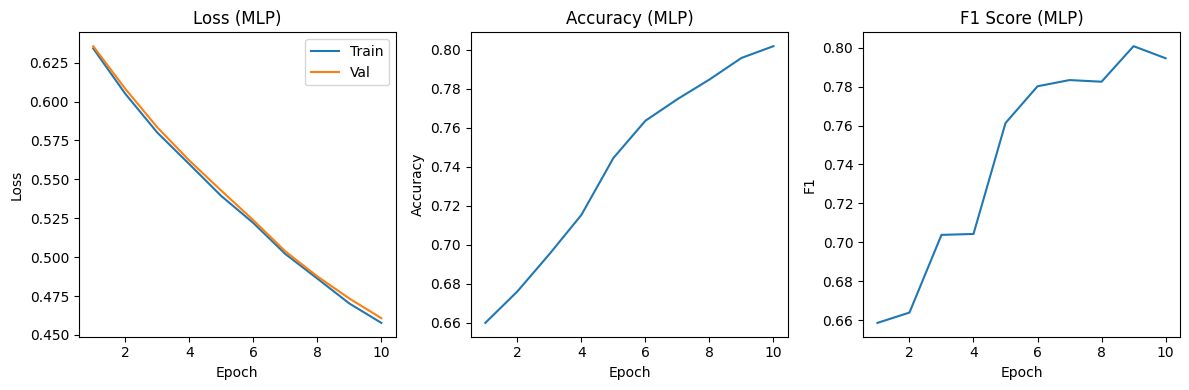


🔍 Test (MLP): Acc=0.787  Prec=0.824  Rec=0.731  F1=0.774


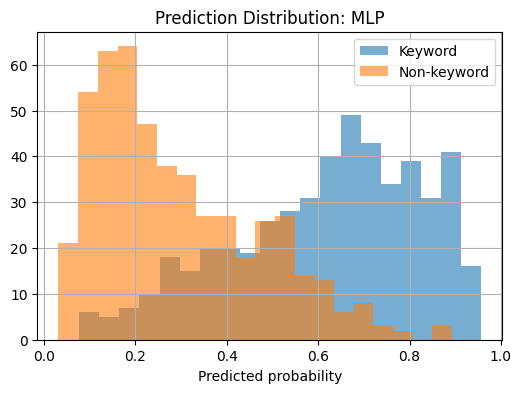

In [ ]:
# MLP Classifier
mlp_model = MLPClassifier(input_dim=X.shape[1]).to(device)
mlp_hist = train_model(mlp_model, train_loader, val_loader, epochs=10, X_all=X)
plot_history(mlp_hist, title_suffix=" (MLP)")
evaluate(mlp_model, test_loader, name="MLP")